# RAKAMIN ID/X DATA SCIENTIST

# PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# preproces Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv", dtype={'desc' : str})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


jumlah baris dan kolom dari dataset

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (466285, 75)


mengatur jumlah maksimum kolom yang ditampilkan

In [ ]:
pd.set_option("display.max_columns", 500)

mencari/menampilkan data duplikat

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.head())

   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

mencari tahu jumlah missing value pada setiap kolom

In [ ]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

<Axes: >

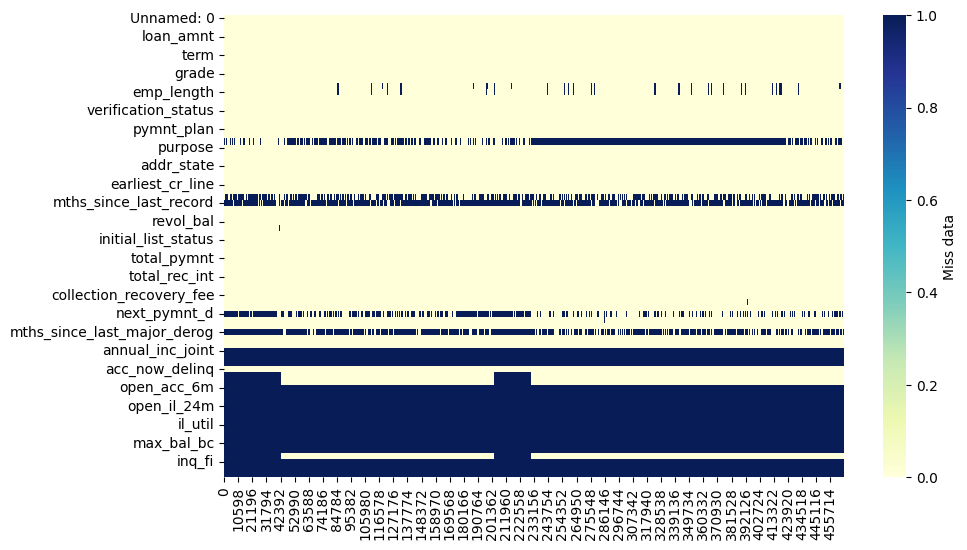

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Miss data'})

In [ ]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
Unnamed: 0,1.000000,0.493963,0.503014,0.075282,0.080043,0.090814,0.033313,0.070622,0.026413,0.097809,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.003080,NaN,NaN,NaN
id,0.493963,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023957,NaN,NaN,NaN
member_id,0.503014,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023818,NaN,NaN,NaN
loan_amnt,0.075282,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,...,NaN,NaN,NaN,NaN,NaN,NaN,0.290208,NaN,NaN,NaN
funded_amnt,0.080043,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,...,NaN,NaN,NaN,NaN,NaN,NaN,0.290206,NaN,NaN,NaN
funded_amnt_inv,0.090814,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,...,NaN,NaN,NaN,NaN,NaN,NaN,0.290185,NaN,NaN,NaN
int_rate,0.033313,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.146838,NaN,NaN,NaN
installment,0.070622,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,...,NaN,NaN,NaN,NaN,NaN,NaN,0.270074,NaN,NaN,NaN
annual_inc,0.026413,0.024231,0.024921,0.370893,0.370311,0.367806,-0.046072,0.368145,1.000000,-0.188548,...,NaN,NaN,NaN,NaN,NaN,NaN,0.291955,NaN,NaN,NaN
dti,0.097809,0.130291,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188548,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.060972,NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'], axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [ ]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

# Label

In [ ]:
unsure = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

df = df[df.loan_status.isin(unsure) == False]

df['loan_type'] = np.where(df['loan_status'].isin(good_loan), 'good', 'bad')

In [ ]:
leakages = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

df.drop(columns=leakages, axis=1, inplace=True)

In [ ]:
df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc'], axis=1, inplace=True)

In [ ]:
df.loan_type.value_counts()

good    186727
bad      52186
Name: loan_type, dtype: int64

<Axes: title={'center': 'Loan Type'}, xlabel='None'>

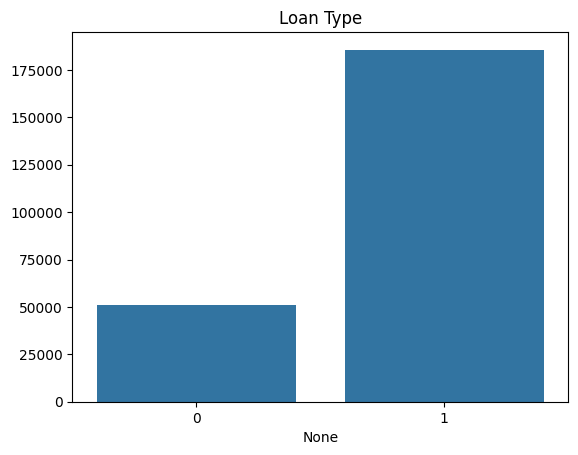

In [ ]:
plt.title('Loan Type')
sns.barplot(x=df.loan_type.value_counts().index,y=df.loan_type.value_counts().values)

data baik dan buruk peminjam,sangat jauh jaraknya membuat data menjadi imbalance

mengubah nilai tipe data kategorikal (string atau objek) menjadi tipe data numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["loan_type"] = label_encoder.fit_transform(df["loan_type"])
df["loan_type"]

0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_type, Length: 238913, dtype: int64

In [ ]:
df.loan_type.value_counts()

1    186727
0     52186
Name: loan_type, dtype: int64

In [ ]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_type
Unnamed: 0,1.000000,0.092534,0.101075,0.098756,0.023004,0.120171,0.067826,-0.019218,-0.016990,-0.042085,...,NaN,NaN,NaN,NaN,NaN,-0.004503,NaN,NaN,NaN,-0.068487
loan_amnt,0.092534,1.000000,0.213034,0.955487,0.351752,0.059806,0.012633,-0.005147,-0.035943,0.050370,...,NaN,NaN,NaN,NaN,NaN,0.349787,NaN,NaN,NaN,-0.074628
int_rate,0.101075,0.213034,1.000000,0.202959,-0.019188,0.172882,0.101608,0.199684,-0.059043,0.017354,...,NaN,NaN,NaN,NaN,NaN,-0.173980,NaN,NaN,NaN,-0.255543
installment,0.098756,0.955487,0.202959,1.000000,0.348475,0.061341,0.024708,0.008567,-0.041015,0.031928,...,NaN,NaN,NaN,NaN,NaN,0.324213,NaN,NaN,NaN,-0.055635
annual_inc,0.023004,0.351752,-0.019188,0.348475,1.000000,-0.176951,0.055639,0.057863,-0.054251,-0.078688,...,NaN,NaN,NaN,NaN,NaN,0.329248,NaN,NaN,NaN,0.060564
dti,0.120171,0.059806,0.172882,0.061341,-0.176951,1.000000,0.000712,-0.004624,0.016716,0.102958,...,NaN,NaN,NaN,NaN,NaN,0.061768,NaN,NaN,NaN,-0.128055
delinq_2yrs,0.067826,0.012633,0.101608,0.024708,0.055639,0.000712,1.000000,0.022205,-0.567028,-0.053298,...,NaN,NaN,NaN,NaN,NaN,-0.038597,NaN,NaN,NaN,-0.030770
inq_last_6mths,-0.019218,-0.005147,0.199684,0.008567,0.057863,-0.004624,0.022205,1.000000,-0.009669,-0.155063,...,NaN,NaN,NaN,NaN,NaN,0.024834,NaN,NaN,NaN,-0.055262
mths_since_last_delinq,-0.016990,-0.035943,-0.059043,-0.041015,-0.054251,0.016716,-0.567028,-0.009669,1.000000,0.139586,...,NaN,NaN,NaN,NaN,NaN,-0.043876,NaN,NaN,NaN,0.027424
mths_since_last_record,-0.042085,0.050370,0.017354,0.031928,-0.078688,0.102958,-0.053298,-0.155063,0.139586,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.009010,NaN,NaN,NaN,-0.017679


In [ ]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [ ]:
df.isnull().sum()

Unnamed: 0                          0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13478
emp_length                       9225
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
title                              15
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         133528
mths_since_last_record         209964
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        232
total_acc   

menghapus data yang tidak meiliki kontribusi

In [ ]:
df.drop(columns=['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',  'total_cu_tl', 'inq_last_12m'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                          0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13478
emp_length                       9225
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
title                              15
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         133528
mths_since_last_record         209964
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        232
total_acc   

In [ ]:
df.emp_title.value_counts()

Teacher                          1652
Manager                          1622
RN                                715
Supervisor                        712
Registered Nurse                  712
                                 ... 
COLDWELL BANKER                     1
the hospital of central conn        1
Powhatan County Schools             1
PhyAmerica Government Service       1
Server Engineer Lead                1
Name: emp_title, Length: 129889, dtype: int64

In [ ]:
df.earliest_cr_line.value_counts()

Oct-00    2033
Oct-99    1890
Nov-00    1856
Oct-01    1848
Nov-99    1819
          ... 
Oct-58       1
Dec-60       1
May-62       1
Mar-65       1
Nov-56       1
Name: earliest_cr_line, Length: 634, dtype: int64

Text(0.5, 0, 'jumlah pinjaman')

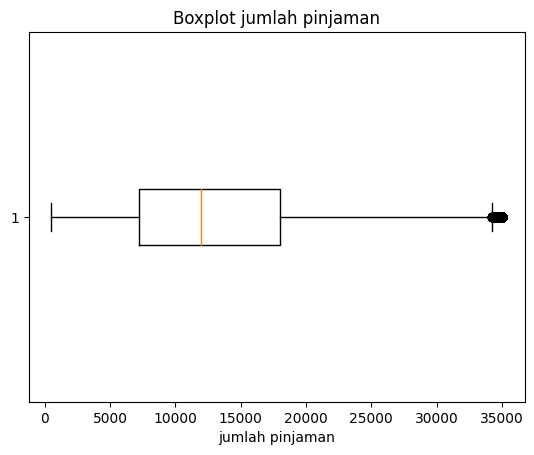

In [ ]:
plt.boxplot(df['loan_amnt'], vert=False)
plt.title("Boxplot jumlah pinjaman")
plt.xlabel('jumlah pinjaman')

In [ ]:
df.last_credit_pull_d.value_counts()

Jan-16    101680
Dec-15     13779
Nov-15      8238
Sep-15      7982
Oct-15      7848
           ...  
Nov-07         3
May-08         1
Jun-08         1
Jul-08         1
Jul-07         1
Name: last_credit_pull_d, Length: 103, dtype: int64

Text(0.5, 0, 'Int rate')

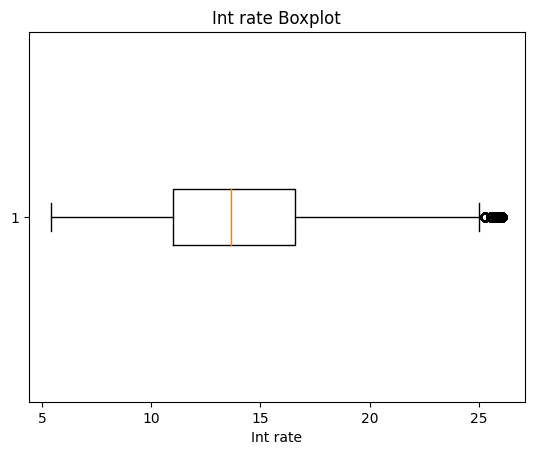

In [ ]:
plt.boxplot(df['int_rate'], vert=False)
plt.title("Int rate Boxplot")
plt.xlabel('Int rate')

In [ ]:
df.emp_length.value_counts()

10+ years    71312
2 years      22352
< 1 year     19998
3 years      19395
5 years      17297
1 year       16078
4 years      15402
6 years      14300
7 years      13466
8 years      11092
9 years       8996
Name: emp_length, dtype: int64

mengubah value emp length menjadi numerik

In [ ]:
df.emp_length = df.emp_length.astype('str')

In [ ]:
df.emp_length.dtypes

dtype('O')

In [ ]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

 menghilangkan semua karakter kecuali angka dari kolom emp length

In [ ]:
import re
df.emp_length = [re.sub('[^0-9]', '', x) for x in df.emp_length]

In [ ]:
df.emp_length.value_counts()

10    71312
1     36076
2     22352
3     19395
5     17297
4     15402
6     14300
7     13466
8     11092
       9225
9      8996
Name: emp_length, dtype: int64

In [ ]:
df.emp_length = pd.to_numeric(df.emp_length)

menangani missing value dalam data dengan menggantikannya dengan nilai yang lebih representatif, dalam hal ini menggunakan rata-rata dari masing-masing kolom

In [ ]:
df.emp_length.replace(np.nan, df.emp_length.astype("float").mean(axis=0), inplace=True)
df.annual_inc.replace(np.nan, df.annual_inc.astype("float").mean(axis=0), inplace=True)
df.delinq_2yrs.replace(np.nan, df.delinq_2yrs.astype("float").mean(axis=0), inplace=True)
df.inq_last_6mths.replace(np.nan, df.inq_last_6mths.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_delinq.replace(np.nan, df.mths_since_last_delinq.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_record.replace(np.nan, df.mths_since_last_record.astype("float").mean(axis=0), inplace=True)
df.open_acc.replace(np.nan, df.open_acc.astype("float").mean(axis=0), inplace=True)
df.pub_rec.replace(np.nan, df.pub_rec.astype("float").mean(axis=0), inplace=True)
df.revol_util.replace(np.nan, df.revol_util.astype("float").mean(axis=0), inplace=True)
df.total_acc.replace(np.nan, df.total_acc.astype("float").mean(axis=0), inplace=True)
df.collections_12_mths_ex_med.replace(np.nan, df.collections_12_mths_ex_med.astype("float").mean(axis=0), inplace=True)
df.mths_since_last_major_derog.replace(np.nan, df.mths_since_last_major_derog.astype("float").mean(axis=0), inplace=True)
df.acc_now_delinq.replace(np.nan, df.acc_now_delinq.astype("float").mean(axis=0), inplace=True)
df.tot_coll_amt.replace(np.nan, df.tot_coll_amt.astype("float").mean(axis=0), inplace=True)
df.tot_cur_bal.replace(np.nan, df.tot_cur_bal.astype("float").mean(axis=0), inplace=True)
df.total_rev_hi_lim.replace(np.nan, df.total_rev_hi_lim.astype("float").mean(axis=0), inplace=True)

handling missing data dengan menggantikannya dengan nilai yang paling sering muncul, sehingga mempertahankan karakteristik distribusi data yang ada.

In [ ]:
df.emp_title.replace(np.nan, df.emp_title.value_counts().idxmax(), inplace=True)
df.title.replace(np.nan, df.title.value_counts().idxmax(), inplace=True)
df.earliest_cr_line.replace(np.nan, df.earliest_cr_line.value_counts().idxmax(), inplace=True)
df.last_credit_pull_d.replace(np.nan, df.last_credit_pull_d.value_counts().idxmax(), inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                     0
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
last_credit_pull_d             0
collections_12_mths_ex_med     0
mths_since

In [ ]:
df.purpose.value_counts()

debt_consolidation    139085
credit_card            47640
home_improvement       13891
other                  13705
major_purchase          5974
small_business          4799
car                     3505
medical                 2714
wedding                 2017
moving                  1900
house                   1537
vacation                1468
educational              422
renewable_energy         256
Name: purpose, dtype: int64

In [ ]:
df.addr_state.value_counts()

CA    40550
NY    20608
TX    18161
FL    16647
NJ     9243
IL     8806
PA     8071
GA     7574
VA     7549
OH     7333
NC     6459
MA     5912
AZ     5686
MD     5680
MI     5571
WA     5507
CO     5184
MN     4122
MO     3795
CT     3554
NV     3553
OR     3096
AL     2973
WI     2883
LA     2783
SC     2659
IN     2524
TN     2238
KY     2140
OK     2016
KS     1960
UT     1942
AR     1670
HI     1373
NM     1288
NH     1094
WV     1080
RI     1025
DC      794
MT      713
AK      633
DE      628
WY      559
SD      514
VT      398
MS      325
NE       14
IA       13
ID        9
ME        4
Name: addr_state, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [ ]:
df.grade.value_counts()

B    72239
C    61042
A    39500
D    38715
E    18086
F     7348
G     1983
Name: grade, dtype: int64

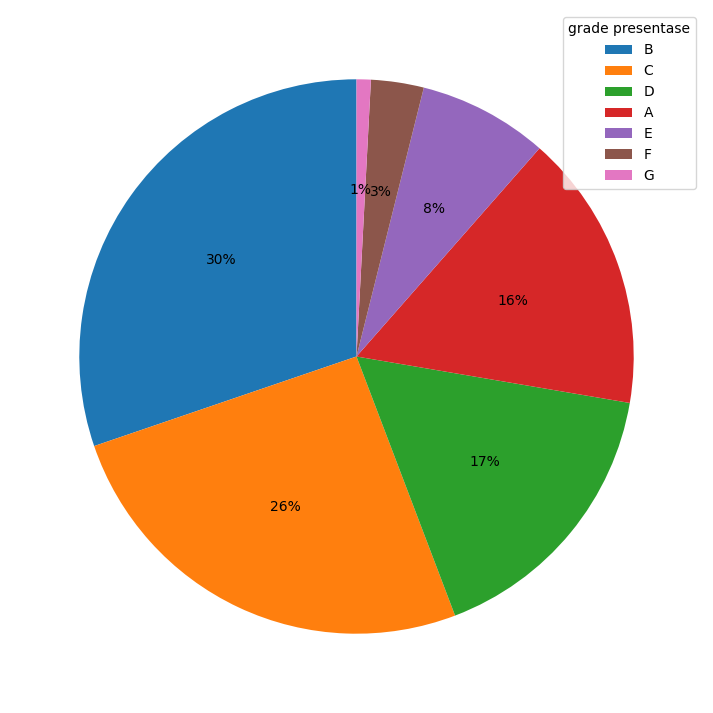

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=df['grade'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="grade presentase", loc="upper right", labels=["B", "C", "D", "A", "E", "F", "G"])
plt.show()

membuat DataFrame baru, df_plot_grade, dengan menghitung jumlah peminjam berdasarkan kombinasi grade dan loan_type dari DataFrame asli df.Ini memanfaatkan operasi grup dan pivot pada pandas untuk mengorganisir data

In [ ]:
df_plot_grade = df.groupby(['grade', 'loan_type']).size().reset_index().pivot(columns='grade', index='loan_type', values=0)

<Axes: title={'center': 'Grade to Loan Type'}, xlabel='loan_type'>

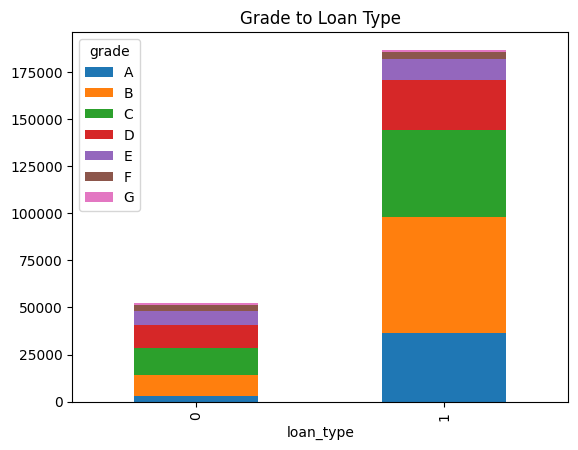

In [ ]:
df_plot_grade.plot(title="Grade to Loan Type", kind='bar', stacked=True)

 menggunakan LabelEncoder dari library scikit-learn untuk mengkodekan variabel kategori dalam DataFrame menjadi nilai numerik

In [ ]:
df.term = label_encoder.fit_transform(df.term)
df.grade = label_encoder.fit_transform(df.grade)
df.emp_title = label_encoder.fit_transform(df.emp_title)
df.home_ownership = label_encoder.fit_transform(df.home_ownership)
df.sub_grade = label_encoder.fit_transform(df.sub_grade)
df.verification_status = label_encoder.fit_transform(df.verification_status)
df.purpose = label_encoder.fit_transform(df.purpose)
df.zip_code = label_encoder.fit_transform(df.zip_code)
df.addr_state = label_encoder.fit_transform(df.addr_state)
df.earliest_cr_line = label_encoder.fit_transform(df.earliest_cr_line)
df.initial_list_status = label_encoder.fit_transform(df.initial_list_status)
df.last_credit_pull_d = label_encoder.fit_transform(df.last_credit_pull_d)
df.application_type = label_encoder.fit_transform(df.initial_list_status)
df.title = label_encoder.fit_transform(df.title)

 membuat plot distribusi kernel (KDE) dari kolom loan_amnt dalam DataFrame. Ini memberikan gambaran visual tentang sebaran nilai loan_amnt

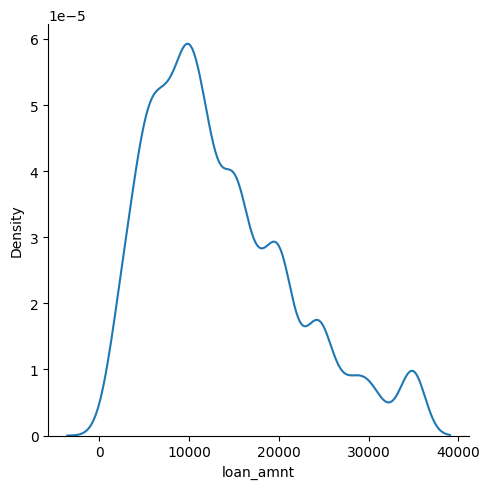

In [ ]:
sns.displot(data=df, x="loan_amnt", kind="kde", bw_adjust=2)

memberikan gambaran visual tentang sebaran probabilitas pendapatan tahunan peminjam, dengan parameter

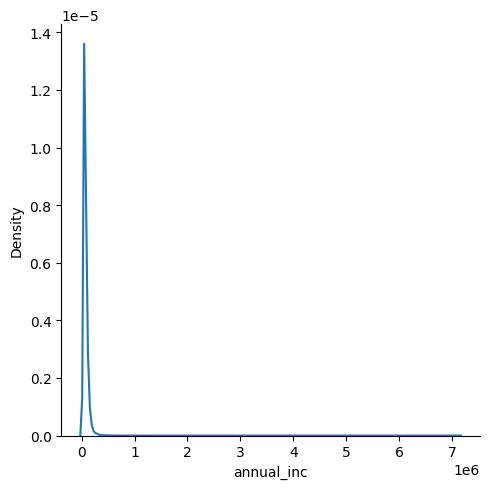

In [ ]:
sns.displot(data=df, x="annual_inc", kind="kde", bw_adjust=2)

In [ ]:
df.dtypes

Unnamed: 0                       int64
loan_amnt                        int64
term                             int64
int_rate                       float64
installment                    float64
grade                            int64
sub_grade                        int64
emp_title                        int64
emp_length                     float64
home_ownership                   int64
annual_inc                     float64
verification_status              int64
purpose                          int64
title                            int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                 int64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util               

In [ ]:
df.corr().loan_type

Unnamed: 0                    -0.068487
loan_amnt                     -0.074628
term                          -0.175030
int_rate                      -0.255543
installment                   -0.055635
grade                         -0.250580
sub_grade                     -0.256266
emp_title                     -0.048007
emp_length                    -0.004954
home_ownership                -0.048863
annual_inc                     0.060564
verification_status           -0.076695
purpose                       -0.019592
title                         -0.008083
zip_code                       0.020080
addr_state                    -0.006059
dti                           -0.128055
delinq_2yrs                   -0.030769
earliest_cr_line               0.008203
inq_last_6mths                -0.055260
mths_since_last_delinq         0.018477
mths_since_last_record        -0.006333
open_acc                      -0.027891
pub_rec                       -0.017209
revol_bal                      0.001998


menghapus data yang tidak memiliki korelasi dengan loan_type

In [ ]:
uncorrelated = ['loan_amnt', 'installment', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs',
                'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
                'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code',
                'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df.drop(columns=uncorrelated, axis=1, inplace=True)

In [ ]:
df.corr().loan_type

Unnamed: 0   -0.068487
term         -0.175030
int_rate     -0.255543
grade        -0.250580
sub_grade    -0.256266
dti          -0.128055
loan_type     1.000000
Name: loan_type, dtype: float64

Text(0.5, 0, 'term')

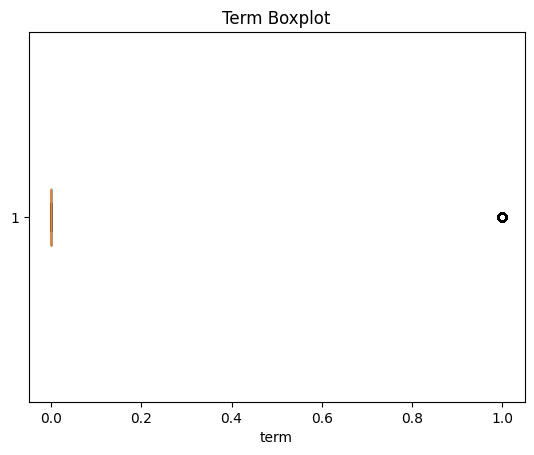

In [ ]:
plt.boxplot(df['term'], vert=False)
plt.title("Term Boxplot")
plt.xlabel('term')

Text(0.5, 0, 'Int rate')

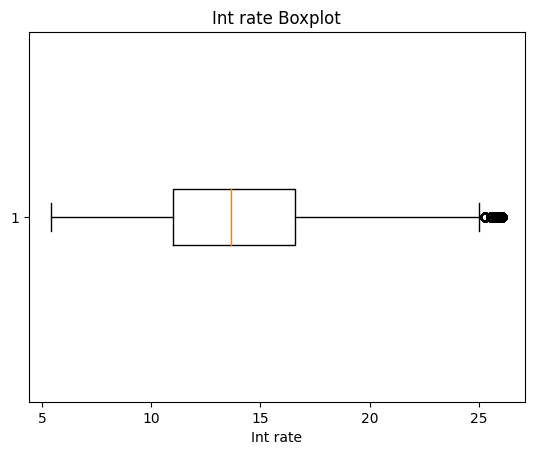

In [ ]:
plt.boxplot(df['int_rate'], vert=False)
plt.title("Int rate Boxplot")
plt.xlabel('Int rate')

Text(0.5, 0, 'grade')

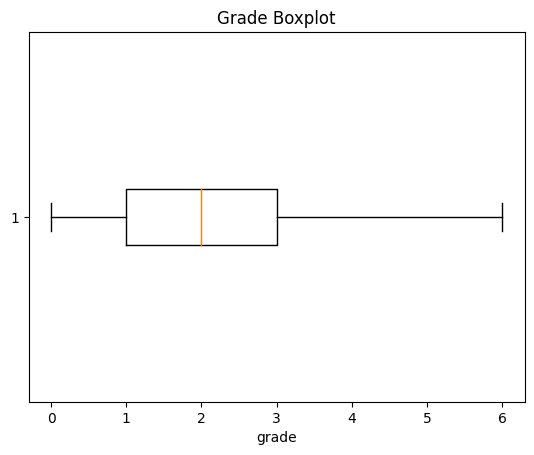

In [ ]:
plt.boxplot(df['grade'], vert=False)
plt.title("Grade Boxplot")
plt.xlabel('grade')

Text(0.5, 0, 'sub_grade')

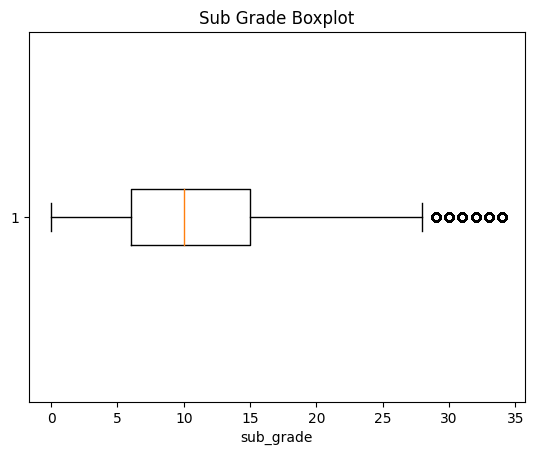

In [ ]:
plt.boxplot(df['sub_grade'], vert=False)
plt.title("Sub Grade Boxplot")
plt.xlabel('sub_grade')

Text(0.5, 0, 'dti')

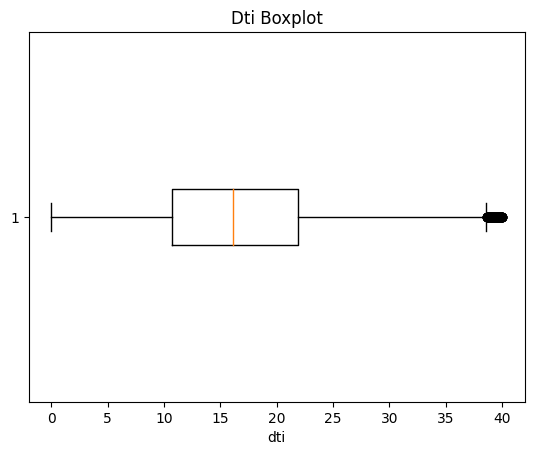

In [ ]:
plt.boxplot(df['dti'], vert=False)
plt.title("Dti Boxplot")
plt.xlabel('dti')

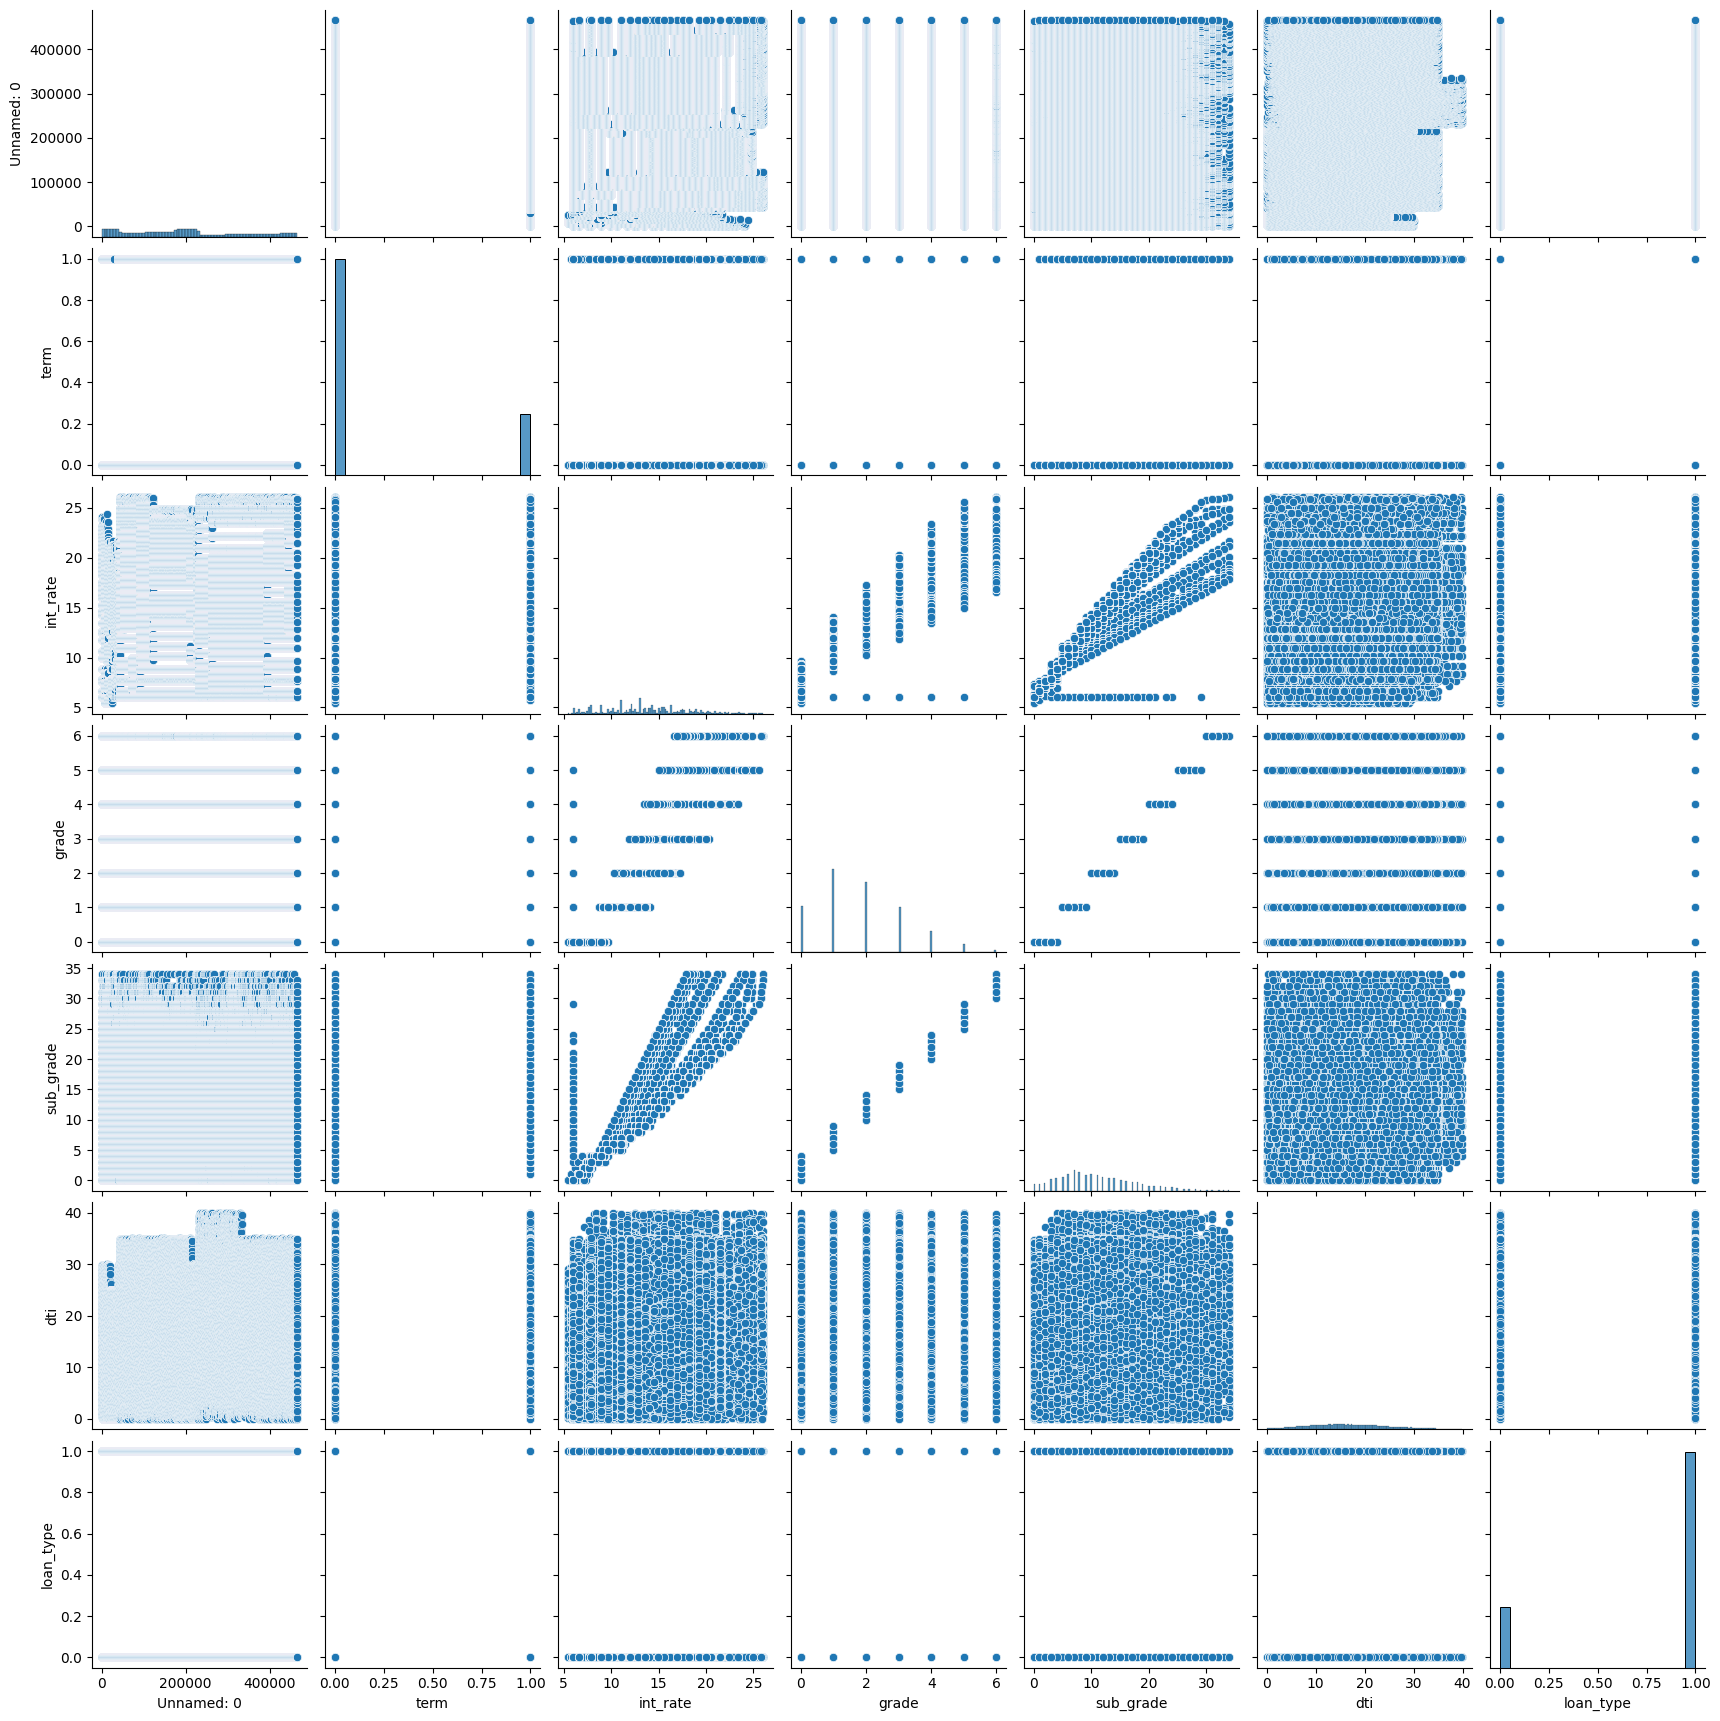

In [ ]:
sns.pairplot(data=df)

In [ ]:
from scipy import stats

menghapus outlier dari DataFrame

In [ ]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

memberikan nilai 1 dan 0 pada loan type

*   1 = GOOD
*   0 = BAD



In [ ]:
df_class_0 = df[df.loan_type == 0]
df_class_1 = df[df.loan_type == 1]

In [ ]:
count_class_1, count_class_0 = df.loan_type.value_counts()

In [ ]:
count_class_1, count_class_0

(185646, 51213)

menangani imbalance kelas dalam dataset loan_type

In [ ]:
df_balance_1 = pd.concat([df_class_1[0:count_class_0], df_class_0], axis = 0)

In [ ]:
df_balance_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102426 entries, 0 to 466281
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  102426 non-null  int64  
 1   term        102426 non-null  int64  
 2   int_rate    102426 non-null  float64
 3   grade       102426 non-null  int64  
 4   sub_grade   102426 non-null  int64  
 5   dti         102426 non-null  float64
 6   loan_type   102426 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 6.3 MB


In [ ]:
print(df_balance_1.head())

   Unnamed: 0  term  int_rate  grade  sub_grade    dti  loan_type
0           0     0     10.65      1          6  27.65          1
2           2     0     15.96      2         14   8.72          1
3           3     0     13.49      2         10  20.00          1
5           5     0      7.90      0          3  11.20          1
7           7     0     18.64      4         20   5.35          1


# MODEL&TRAIN

# LOGISTIC REGRESION

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = df_balance_1.drop("loan_type", axis = "columns")
y = df_balance_1["loan_type"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

melakukan tuning parameter pada model Logistic Regression menggunakan pendekatan Randomized Search Cross Validation untuk mencari kombinasi parameter yang memberikan kinerja terbaik

In [ ]:
lgc = LogisticRegression(n_jobs = -1)
param_grid =  {'C': [0.1,0.6,0.8],
              'fit_intercept': [True,False],
              'solver': ['lbfgs','liblinear', 'sag', 'saga']}

clf_lg = RandomizedSearchCV(lgc, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2)
tuned_lg = clf_lg.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............C=0.1, fit_intercept=False, solver=saga; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............C=0.1, fit_intercept=False, solver=saga; total time=   1.9s
[CV] END ............C=0.1, fit_intercept=False, solver=saga; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   2.8s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   1.2s
[CV] END ...........C=0.8, fit_intercept=False, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=False, solver=sag; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.8, fit_intercept=True, solver=sag; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=True, solver=saga; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=True, solver=saga; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.6, fit_intercept=True, solver=saga; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ..............C=0.6, fit_intercept=True, solver=sag; total time=   2.4s
[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END ........C=0.8, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   1.3s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   1.5s
[CV] END ............C=0.6, fit_intercept=True, solver=lbfgs; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=True, solver=saga; total time=   2.5s
[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ........C=0.1, fit_intercept=True, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END .......C=0.6, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   1.2s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   1.5s
[CV] END ...........C=0.6, fit_intercept=False, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ............C=0.8, fit_intercept=False, solver=saga; total time=   1.8s
[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s
[CV] END .......C=0.1, fit_intercept=False, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.8, fit_intercept=False, solver=sag; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............C=0.1, fit_intercept=True, solver=sag; total time=   1.4s
[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   1.2s
[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   1.6s
[CV] END ...........C=0.1, fit_intercept=False, solver=lbfgs; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.2s
[CV] END ........C=0.6, fit_intercept=True, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=True, solver=saga; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............C=0.1, fit_intercept=False, solver=sag; total time=   1.8s


Evaluasi

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
y_pred1 = tuned_lg.predict(x_test)
print(classification_report(y_test, y_pred1))

Accuracy: 0.8031826613296885
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     10243
           1       0.79      0.83      0.81     10243

    accuracy                           0.80     20486
   macro avg       0.80      0.80      0.80     20486
weighted avg       0.80      0.80      0.80     20486



# ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

Training

In [ ]:
y_score = tuned_lg.predict_proba(x_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

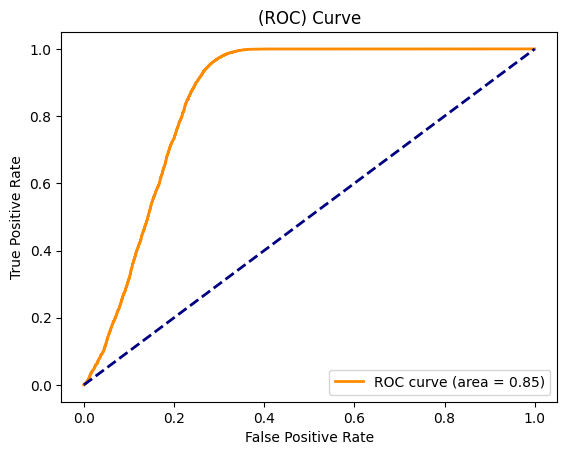

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

TESTING

In [ ]:
y_score_test = tuned_lg.predict_proba(x_test)[:, 1]

In [ ]:
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

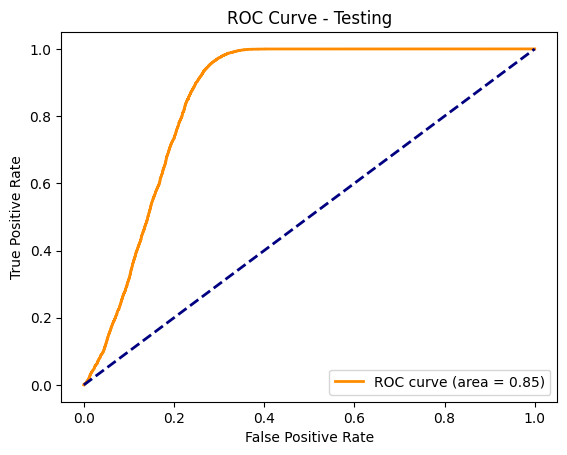

In [ ]:
# Menghitung skor probabilitas prediksi untuk kelas positif pada data uji
y_score_test = tuned_lg.predict_proba(x_test)[:, 1]

# Menghitung kurva ROC untuk data uji
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot kurva ROC untuk data uji
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix

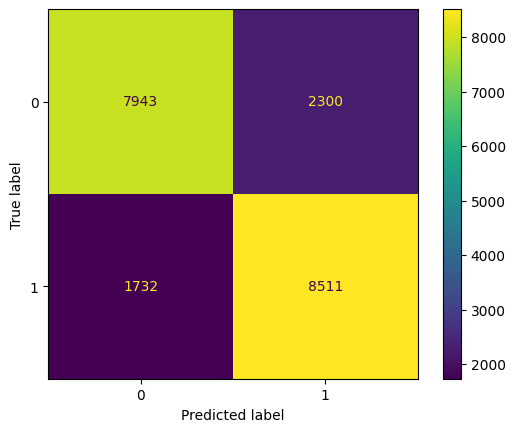

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tuned_lg.classes_)
disp.plot()

hasil prediksi

In [ ]:
y_pred1[9]

1

In [ ]:
y_pred1[6]

0

Hasil dari model pertama adalah akurasi 80%

# DECISION TREE

In [ ]:
X = df_balance_1.drop("loan_type", axis = "columns")
y = df_balance_1["loan_type"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Model Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

Training model

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8292492433857268
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10243
           1       0.83      0.83      0.83     10243

    accuracy                           0.83     20486
   macro avg       0.83      0.83      0.83     20486
weighted avg       0.83      0.83      0.83     20486



Confusion Matrix

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)

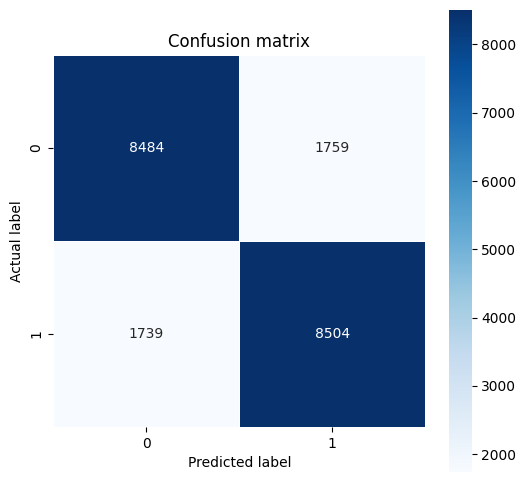

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

hasil prediksi

In [ ]:
y_pred[6]

0

In [ ]:
y_pred1[10]

1

In [ ]:
y_pred1[9]

1

Hasil dari model kedua adalah akurasi 83%

# EDA

STATUS LOAN

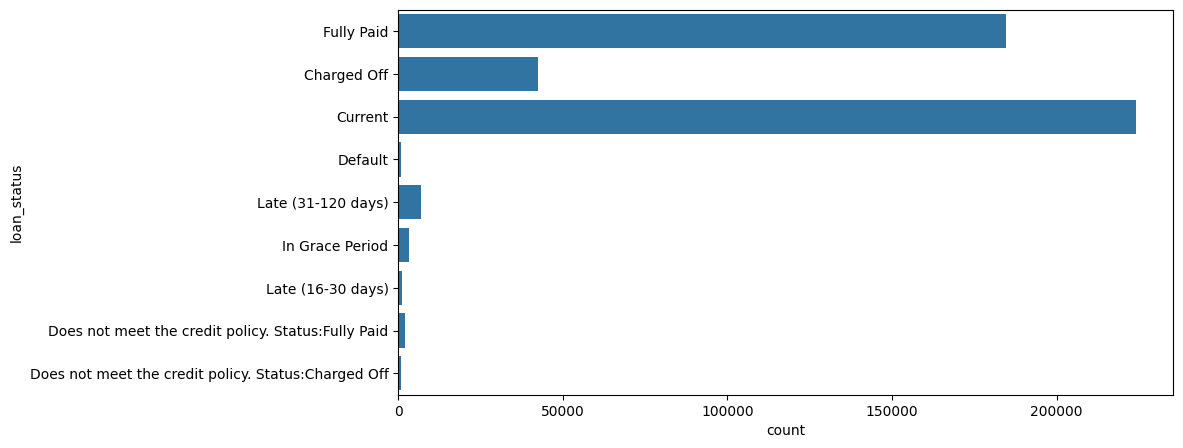

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df)
plt.show()

value_counts = df["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

membagi yang berhasil dan gagal lalu di kategorikan 1 dan 0

In [ ]:
succes = ["Fully Paid"]
fail = ["Charged Off",
        "Default",
        "Does not meet the credit policy. Status:Charged off",
        "Does not meet the credit policy. Status:Fully Paid"]

In [ ]:
def loan(status):
    if status in fail:
        return 0
    return 1

1 berhasil membayar,0 gagal membayar

In [ ]:
df = df[df["loan_status"].isin(succes + fail)].copy()
df["loan_status"] = df["loan_status"].apply(loan)

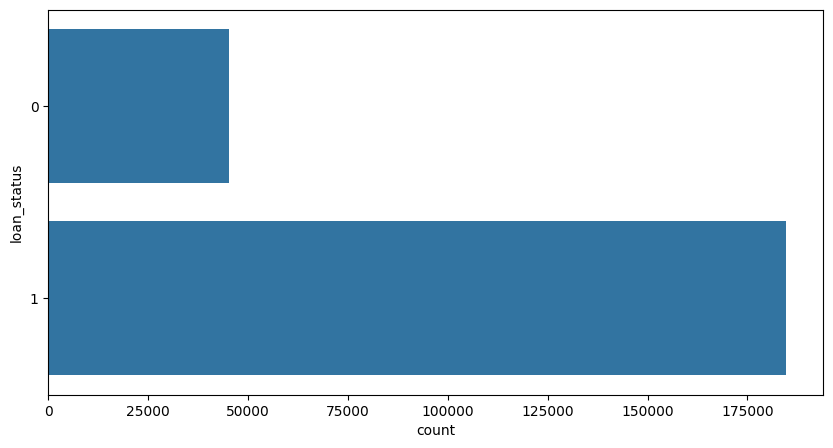

1    80.31%
0    19.69%
Name: loan_status, dtype: object


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y= "loan_status", data = df)
plt.show()

value_counts = df["loan_status"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

jumlah pinjaman

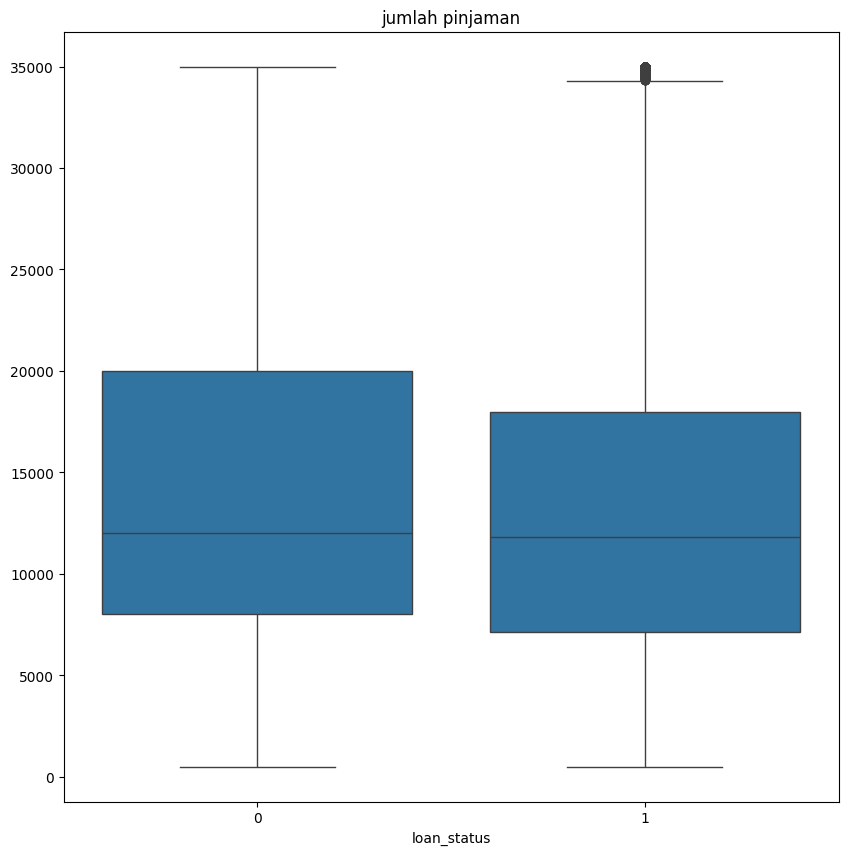

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,45295.0,14284.170990,8369.207368,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [ ]:
x = "loan_status"
y = "loan_amnt"

plt.figure(figsize=(10,10))
sns.boxplot(data = df, x=x , y=y)
plt.title("jumlah pinjaman")
plt.ylabel("")
plt.show()

df.groupby(x)[y].describe()

jumlah pinjaman terbanyak adalah oleh client yang telah membayar tetapi untuk rata ratanya masih tinggi di client yang belum membayar

tujuan peminjaman

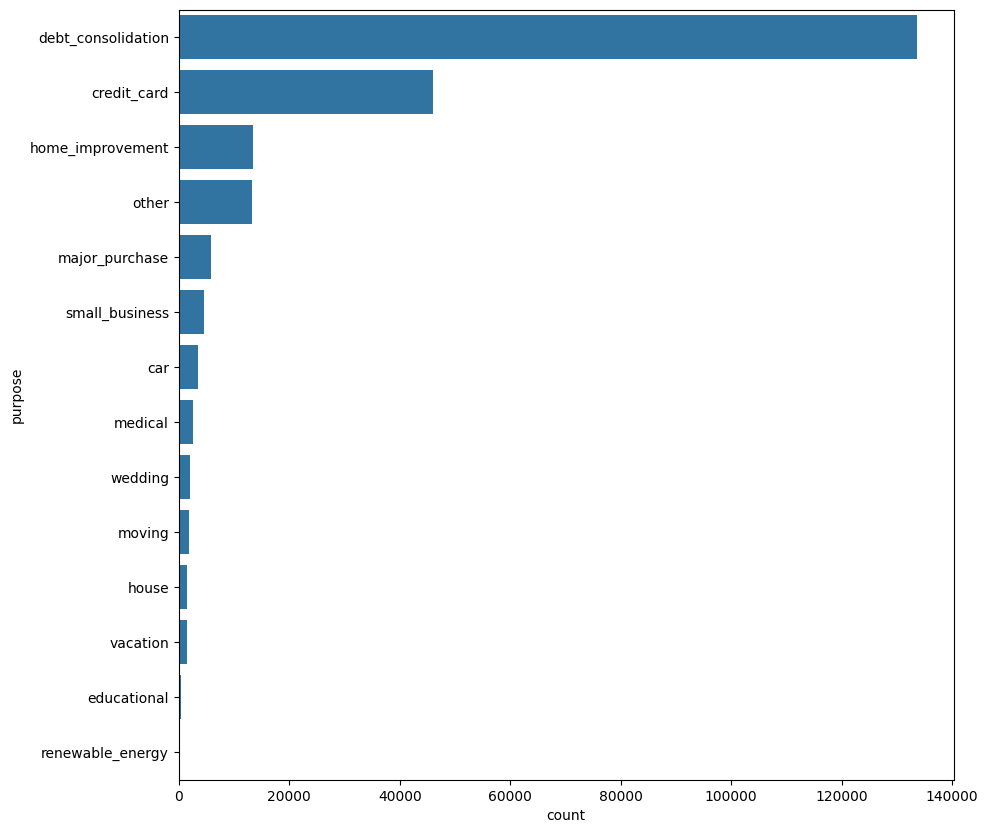

debt_consolidation    58.09%
credit_card           19.99%
home_improvement       5.81%
other                  5.73%
major_purchase         2.53%
small_business         1.99%
car                    1.50%
medical                1.14%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.17%
renewable_energy       0.11%
Name: purpose, dtype: object


In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y= "purpose",order=value_counts.index, data = df)
plt.show()

value_counts = df["purpose"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

paling banyak client meminjam uang untuk menutup hutang sebelumnya

negara peminjam

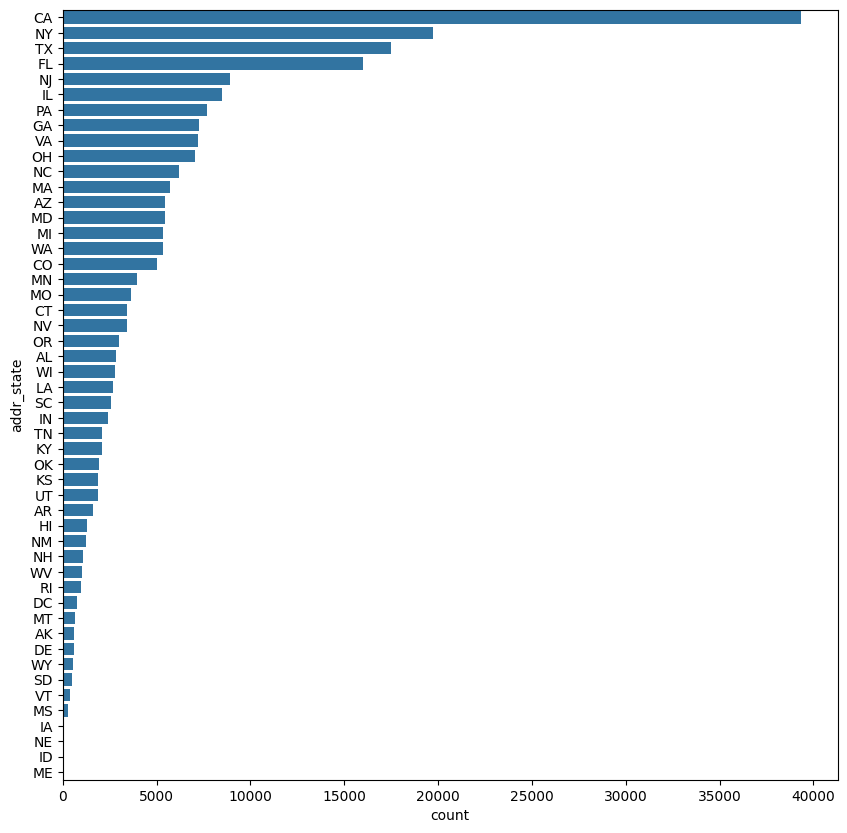

CA    17.10%
NY     8.58%
TX     7.60%
FL     6.95%
NJ     3.87%
IL     3.69%
PA     3.35%
GA     3.17%
VA     3.14%
OH     3.06%
NC     2.70%
MA     2.48%
AZ     2.38%
MD     2.37%
MI     2.33%
WA     2.32%
CO     2.18%
MN     1.73%
MO     1.59%
CT     1.50%
NV     1.48%
OR     1.31%
AL     1.24%
WI     1.21%
LA     1.16%
SC     1.12%
IN     1.04%
TN     0.91%
KY     0.90%
OK     0.84%
KS     0.83%
UT     0.82%
AR     0.70%
HI     0.57%
NM     0.54%
NH     0.46%
WV     0.45%
RI     0.43%
DC     0.34%
MT     0.29%
AK     0.27%
DE     0.26%
WY     0.24%
SD     0.21%
VT     0.17%
MS     0.12%
IA     0.00%
NE     0.00%
ID     0.00%
ME     0.00%
Name: addr_state, dtype: object


In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y= "addr_state",order=value_counts.index, data = df)
plt.show()

value_counts = df["addr_state"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

peminjam terbanyak dari california


pemilikan rumah

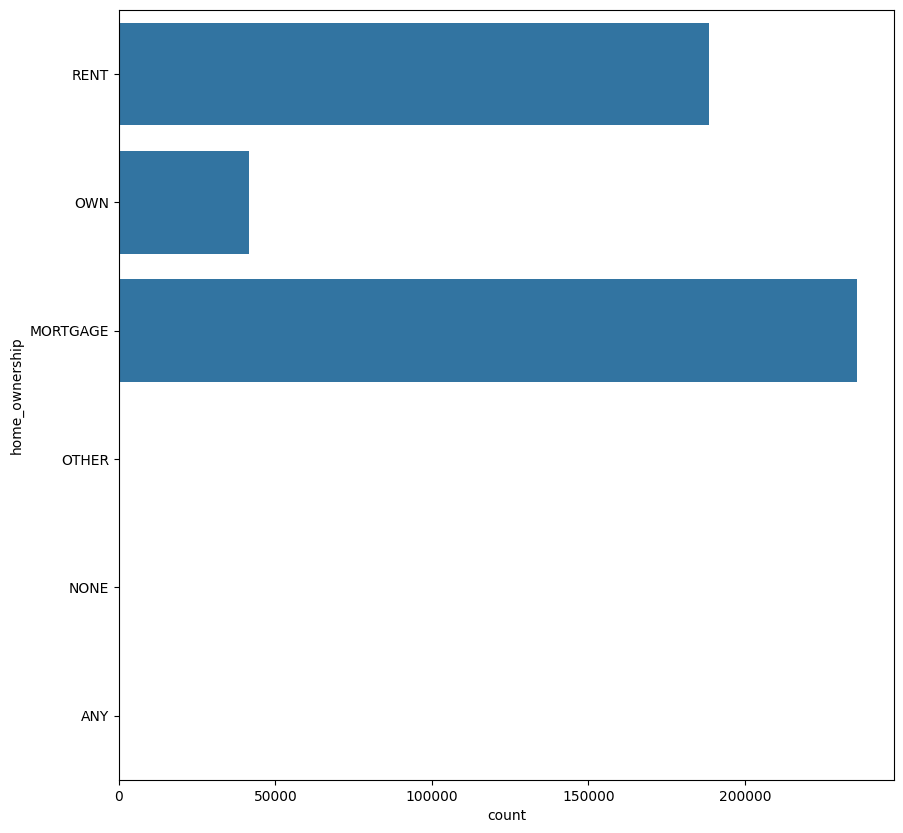

MORTGAGE    50.59%
RENT        40.42%
OWN          8.94%
OTHER        0.04%
NONE         0.01%
ANY          0.00%
Name: home_ownership, dtype: object


In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y= "home_ownership", data = df)
plt.show()

value_counts = df["home_ownership"].value_counts()
percentage = value_counts / value_counts.sum()
percentage = percentage.apply("{:.2%}".format)
print(percentage)

sebagian besar peminjam adalah client yang tidak mempunyai rumah dan masih memiliki tagihan untuk membayar rumahnya

# KESIMPULAN

*   Dataset: Setelah melakukan proses preprocessing pada dataset, diperoleh dataset dengan jumlah 466285 baris dan 75 kolom. Seluruh kolom dalam dataset telah diobservasi dan diolah dengan mengeliminasi kolom-kolom yang tidak relevan, mengisi nilai missing value, dan mengubah tipe data dari kolom-kolom yang diperlukan.
*   Data Imbalance: Seluruh dataset memiliki jumlah kelas yang tidak seimbang, yaitu jumlah 'good' lebih banyak dibandingkan kelas 'bad' dari pengelompokan kolom loan_status.Untuk mengatasi masalah data imbalance dalam pengolahan data credit risk, saya menggunakan metode undersampling. Metode ini menggabungkan data kelas 'bad' sebanyak kelas 'good'. Hal ini dapat dikategorikan sebagai proses undersampling, karena jumlah data kelas 'bad' ditekan ke bawah sehingga menjadi sejumlah yang sama dengan kelas 'good'.
*   Logistic Regression: Setelah melakukan tuning parameter pada model Logistic Regression, didapatkan kombinasi parameter yang memberikan kinerja terbaik dengan akurasi sebesar 80%. Kurva ROC dan Confusion Matrix dapat digunakan sebagai indikator untuk menilai kinerja model.
*   Decision Tree: Selain Logistic Regression, kita juga menggunakan model Decision Tree dengan metrik entropy dan menemukan bahwa model ini memiliki akurasi sebesar 83%.
*   EDA: Seluruh proses EDA menunjukkan bahwa dataset memiliki beberapa insight menarik, seperti jumlah pinjaman yang lebih tinggi pada client yang belum membayar, tujuan peminjaman yang paling tinggi adalah untuk menutup hutang sebelumnya, dan peminjam terbanyak berasal dari California. Selain itu, sebagian besar peminjam tidak memiliki rumah dan masih memiliki tagihan untuk membayar rumahnya.







